In [467]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [468]:
flightdata = pd.read_csv(r'C:\Users\basil\Downloads\flight\flights_data.csv')

In [469]:
flightdata = (flightdata.dropna(how='all'))
flightdata = (flightdata.drop_duplicates())

In [470]:
flightdata = flightdata.copy()

In [471]:
flightdata

,flight_number,aircraft.model,aircraft.reg,aircraft.modeS,airline.name,airline.iata,airline.icao,status,flight_type,codeshareStatus,...,origin_airport_icao,origin_airport_iata,movement.terminal,movement.quality,destination_airport_icao,destination_airport_iata,destination_airport_name,movement.airport.timeZone,movement.scheduledTime.utc,movement.scheduledTime.local
0,PF 769,Airbus A320,NaN,NaN,Air Sial,PF,NaN,Unknown,departure,Unknown,...,OERK,RUH,2.0,['Basic'],OPIS,ISB,Islamabad,Asia/Karachi,2025-03-14 21:01Z,2025-03-15 00:01+03:00
1,XY 333,Airbus A320 NEO,HZ-NS35,710DB9,flynas,XY,KNE,Unknown,departure,IsOperator,...,OERK,RUH,1.0,['Basic'],VILK,LKO,Lucknow,Asia/Kolkata,2025-03-14 21:05Z,2025-03-15 00:05+03:00
2,QP 568,Boeing 737,NaN,NaN,Starlight Airline,QP,SLT,Unknown,departure,Unknown,...,OERK,RUH,3.0,['Basic'],VABB,BOM,Mumbai,Asia/Kolkata,2025-03-14 21:05Z,2025-03-15 00:05+03:00
3,F3 161,Airbus A320,NaN,NaN,flyadeal,F3,FAD,Unknown,departure,Unknown,...,OERK,RUH,5.0,['Basic'],OEJN,JED,Jeddah,Asia/Riyadh,2025-03-14 21:10Z,2025-03-15 00:10+03:00
4,KL 423,Airbus A330-300,NaN,NaN,KLM,KL,KLM,Unknown,departure,Unknown,...,OERK,RUH,1.0,['Basic'],OEDF,DMM,Ad Dammam,Asia/Riyadh,2025-03-14 21:15Z,2025-03-15 00:15+03:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153303,XY 132,NaN,NaN,NaN,flynas,XY,KNE,Unknown,arrival,Unknown,...,OERK,RUH,5.0,['Basic'],OEHL,HAS,Khail,Asia/Riyadh,2025-10-10 08:20Z,2025-10-10 11:20+03:00
153304,SV 1458,NaN,NaN,NaN,Saudi Arabian,SV,SVA,Expected,arrival,Unknown,...,OERK,RUH,5.0,['Basic'],OEMA,MED,Medina,Asia/Riyadh,2025-10-10 08:30Z,2025-10-10 11:30+03:00
153305,KU 773,NaN,NaN,NaN,Kuwait,KU,KAC,Unknown,arrival,Unknown,...,OERK,RUH,3.0,['Basic'],OKBK,KWI,Kuwait City,Asia/Kuwait,2025-10-10 08:30Z,2025-10-10 11:30+03:00
153306,SV 563,NaN,NaN,NaN,Saudi Arabian,SV,SVA,Unknown,arrival,IsOperator,...,OERK,RUH,4.0,['Basic'],OMDB,DXB,Dubai,Asia/Dubai,2025-10-10 08:40Z,2025-10-10 11:40+03:00


In [472]:
out_flight = flightdata[flightdata['destination_airport_icao'].str.startswith('OE', na=False) == False]
new_mode = out_flight['movement.terminal'].mode()[0]
outflight_with_modes= flightdata.loc[out_flight.index,'movement.terminal']=flightdata.loc[out_flight.index,'movement.terminal'].fillna(new_mode)

In [473]:
print(out_flight['movement.terminal'].mode())

0    1.0
Name: movement.terminal, dtype: float64


In [474]:
flightdata[(flightdata['aircraft.model']=='Boeing 787-9') & (flightdata['airline.name']=='Saudi Arabian') & (flightdata['aircraft.modeS']=='71002C')]

,flight_number,aircraft.model,aircraft.reg,aircraft.modeS,airline.name,airline.iata,airline.icao,status,flight_type,codeshareStatus,...,origin_airport_icao,origin_airport_iata,movement.terminal,movement.quality,destination_airport_icao,destination_airport_iata,destination_airport_name,movement.airport.timeZone,movement.scheduledTime.utc,movement.scheduledTime.local
10609,SV 1051,Boeing 787-9,HZ-ARD,71002C,Saudi Arabian,SV,SVA,Unknown,departure,Unknown,...,OERK,RUH,5.0,['Basic'],OEJN,JED,Jeddah,Asia/Riyadh,2025-04-14 19:00Z,2025-04-14 22:00+03:00
30692,SV 1787,Boeing 787-9,HZ-ARD,71002C,Saudi Arabian,SV,SVA,Unknown,departure,Unknown,...,OERK,RUH,5.0,['Basic'],OEGN,GIZ,Jazan,Asia/Riyadh,2025-06-09 12:55Z,2025-06-09 15:55+03:00
30815,SV 1803,Boeing 787-9,HZ-ARD,71002C,Saudi Arabian,SV,SVA,Unknown,departure,Unknown,...,OERK,RUH,5.0,['Basic'],NaN,NaN,Jazan,NaN,2025-06-09 19:45Z,2025-06-09 22:45+03:00
42634,SV 129,Boeing 787-9,HZ-ARD,71002C,Saudi Arabian,SV,SVA,Unknown,departure,IsOperator,...,OERK,RUH,4.0,['Basic'],LFMN,NCE,Nice,Europe/Paris,2025-07-11 06:40Z,2025-07-11 09:40+03:00
45374,SV 195,Boeing 787-9,HZ-ARD,71002C,Saudi Arabian,SV,SVA,Departed,departure,IsOperator,...,OERK,RUH,4.0,['Basic'],LGAV,ATH,Athens,Europe/Athens,2025-07-18 06:30Z,2025-07-18 09:30+03:00
57868,SV 1847,Boeing 787-9,HZ-ARD,71002C,Saudi Arabian,SV,SVA,Unknown,departure,Unknown,...,OERK,RUH,5.0,['Basic'],OENG,EAM,Neyran,Asia/Riyadh,2025-08-18 17:30Z,2025-08-18 20:30+03:00
63585,SV 311,Boeing 787-9,HZ-ARD,71002C,Saudi Arabian,SV,SVA,Unknown,departure,IsOperator,...,OERK,RUH,4.0,['Basic'],HECA,CAI,Cairo,Africa/Cairo,2025-09-02 04:25Z,2025-09-02 07:25+03:00
65160,SV 311,Boeing 787-9,HZ-ARD,71002C,Saudi Arabian,SV,SVA,Unknown,departure,IsOperator,...,OERK,RUH,4.0,['Basic'],HECA,CAI,Cairo,Africa/Cairo,2025-09-06 04:25Z,2025-09-06 07:25+03:00
66915,SV 1229,Boeing 787-9,HZ-ARD,71002C,Saudi Arabian,SV,SVA,Unknown,departure,Unknown,...,OERK,RUH,5.0,['Basic'],OERR,RAE,Arar,Asia/Riyadh,2025-09-10 16:10Z,2025-09-10 19:10+03:00
67850,SV 1021,Boeing 787-9,HZ-ARD,71002C,Saudi Arabian,SV,SVA,Unknown,departure,Unknown,...,OERK,RUH,5.0,['Basic'],OEJN,JED,Jeddah,Asia/Riyadh,2025-09-13 04:00Z,2025-09-13 07:00+03:00


In [475]:
del flightdata['aircraft.reg']
del flightdata['airline.iata']
del flightdata['airline.icao']
del flightdata['aircraft.modeS']
flightdata

,flight_number,aircraft.model,airline.name,status,flight_type,codeshareStatus,isCargo,callSign,origin_airport_name,origin_airport_icao,origin_airport_iata,movement.terminal,movement.quality,destination_airport_icao,destination_airport_iata,destination_airport_name,movement.airport.timeZone,movement.scheduledTime.utc,movement.scheduledTime.local
0,PF 769,Airbus A320,Air Sial,Unknown,departure,Unknown,False,NaN,Riyadh,OERK,RUH,2.0,['Basic'],OPIS,ISB,Islamabad,Asia/Karachi,2025-03-14 21:01Z,2025-03-15 00:01+03:00
1,XY 333,Airbus A320 NEO,flynas,Unknown,departure,IsOperator,False,KNE333,Riyadh,OERK,RUH,1.0,['Basic'],VILK,LKO,Lucknow,Asia/Kolkata,2025-03-14 21:05Z,2025-03-15 00:05+03:00
2,QP 568,Boeing 737,Starlight Airline,Unknown,departure,Unknown,False,NaN,Riyadh,OERK,RUH,3.0,['Basic'],VABB,BOM,Mumbai,Asia/Kolkata,2025-03-14 21:05Z,2025-03-15 00:05+03:00
3,F3 161,Airbus A320,flyadeal,Unknown,departure,Unknown,False,NaN,Riyadh,OERK,RUH,5.0,['Basic'],OEJN,JED,Jeddah,Asia/Riyadh,2025-03-14 21:10Z,2025-03-15 00:10+03:00
4,KL 423,Airbus A330-300,KLM,Unknown,departure,Unknown,False,NaN,Riyadh,OERK,RUH,1.0,['Basic'],OEDF,DMM,Ad Dammam,Asia/Riyadh,2025-03-14 21:15Z,2025-03-15 00:15+03:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153303,XY 132,NaN,flynas,Unknown,arrival,Unknown,False,NaN,Riyadh,OERK,RUH,5.0,['Basic'],OEHL,HAS,Khail,Asia/Riyadh,2025-10-10 08:20Z,2025-10-10 11:20+03:00
153304,SV 1458,NaN,Saudi Arabian,Expected,arrival,Unknown,False,NaN,Riyadh,OERK,RUH,5.0,['Basic'],OEMA,MED,Medina,Asia/Riyadh,2025-10-10 08:30Z,2025-10-10 11:30+03:00
153305,KU 773,NaN,Kuwait,Unknown,arrival,Unknown,False,NaN,Riyadh,OERK,RUH,3.0,['Basic'],OKBK,KWI,Kuwait City,Asia/Kuwait,2025-10-10 08:30Z,2025-10-10 11:30+03:00
153306,SV 563,NaN,Saudi Arabian,Unknown,arrival,IsOperator,False,SVA563,Riyadh,OERK,RUH,4.0,['Basic'],OMDB,DXB,Dubai,Asia/Dubai,2025-10-10 08:40Z,2025-10-10 11:40+03:00


In [476]:
flightdata.duplicated(subset=['flight_number','aircraft.model','airline.name','destination_airport_name','movement.scheduledTime.utc','movement.scheduledTime.local']).sum()
flightdata=flightdata.drop_duplicates(subset=['flight_number','aircraft.model','airline.name','destination_airport_name','movement.scheduledTime.utc','movement.scheduledTime.local'])
flightdata[flightdata.duplicated(subset=['flight_number','aircraft.model','airline.name','destination_airport_name','movement.scheduledTime.utc','movement.scheduledTime.local'])]


,flight_number,aircraft.model,airline.name,status,flight_type,codeshareStatus,isCargo,callSign,origin_airport_name,origin_airport_icao,origin_airport_iata,movement.terminal,movement.quality,destination_airport_icao,destination_airport_iata,destination_airport_name,movement.airport.timeZone,movement.scheduledTime.utc,movement.scheduledTime.local


In [477]:
del flightdata['flight_number']

In [478]:
def full_mode_of_aircraft_model(group):
    modes = group.mode()
    if not modes.empty:
        return group.fillna(modes[0])
    else:
        return group



        

In [479]:
flightdata.loc[:, 'aircraft.model'] = flightdata.groupby(['airline.name','destination_airport_name'])['aircraft.model'].transform(full_mode_of_aircraft_model)


In [480]:
validation_of_aircraft_model = flightdata['aircraft.model'].isnull().sum()
print(validation_of_aircraft_model)

0


In [481]:
flightdata


,aircraft.model,airline.name,status,flight_type,codeshareStatus,isCargo,callSign,origin_airport_name,origin_airport_icao,origin_airport_iata,movement.terminal,movement.quality,destination_airport_icao,destination_airport_iata,destination_airport_name,movement.airport.timeZone,movement.scheduledTime.utc,movement.scheduledTime.local
0,Airbus A320,Air Sial,Unknown,departure,Unknown,False,NaN,Riyadh,OERK,RUH,2.0,['Basic'],OPIS,ISB,Islamabad,Asia/Karachi,2025-03-14 21:01Z,2025-03-15 00:01+03:00
1,Airbus A320 NEO,flynas,Unknown,departure,IsOperator,False,KNE333,Riyadh,OERK,RUH,1.0,['Basic'],VILK,LKO,Lucknow,Asia/Kolkata,2025-03-14 21:05Z,2025-03-15 00:05+03:00
2,Boeing 737,Starlight Airline,Unknown,departure,Unknown,False,NaN,Riyadh,OERK,RUH,3.0,['Basic'],VABB,BOM,Mumbai,Asia/Kolkata,2025-03-14 21:05Z,2025-03-15 00:05+03:00
3,Airbus A320,flyadeal,Unknown,departure,Unknown,False,NaN,Riyadh,OERK,RUH,5.0,['Basic'],OEJN,JED,Jeddah,Asia/Riyadh,2025-03-14 21:10Z,2025-03-15 00:10+03:00
4,Airbus A330-300,KLM,Unknown,departure,Unknown,False,NaN,Riyadh,OERK,RUH,1.0,['Basic'],OEDF,DMM,Ad Dammam,Asia/Riyadh,2025-03-14 21:15Z,2025-03-15 00:15+03:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153303,Airbus A320,flynas,Unknown,arrival,Unknown,False,NaN,Riyadh,OERK,RUH,5.0,['Basic'],OEHL,HAS,Khail,Asia/Riyadh,2025-10-10 08:20Z,2025-10-10 11:20+03:00
153304,Airbus A320,Saudi Arabian,Expected,arrival,Unknown,False,NaN,Riyadh,OERK,RUH,5.0,['Basic'],OEMA,MED,Medina,Asia/Riyadh,2025-10-10 08:30Z,2025-10-10 11:30+03:00
153305,Airbus A320,Kuwait,Unknown,arrival,Unknown,False,NaN,Riyadh,OERK,RUH,3.0,['Basic'],OKBK,KWI,Kuwait City,Asia/Kuwait,2025-10-10 08:30Z,2025-10-10 11:30+03:00
153306,Airbus A320,Saudi Arabian,Unknown,arrival,IsOperator,False,SVA563,Riyadh,OERK,RUH,4.0,['Basic'],OMDB,DXB,Dubai,Asia/Dubai,2025-10-10 08:40Z,2025-10-10 11:40+03:00


In [482]:
del flightdata['isCargo']
del flightdata['codeshareStatus']
del flightdata['movement.quality']
del flightdata['callSign']
del flightdata['origin_airport_icao']
del flightdata['origin_airport_iata']
del flightdata['origin_airport_name']



In [483]:
flightdata.isnull().sum()


aircraft.model                     0
airline.name                       0
status                             0
flight_type                        0
movement.terminal                  0
destination_airport_icao        4105
destination_airport_iata        4105
destination_airport_name           0
movement.airport.timeZone       4105
movement.scheduledTime.utc         0
movement.scheduledTime.local       0
dtype: int64

In [484]:
flightdata.info()

<class 'pandas.core.frame.DataFrame'>
Index: 153029 entries, 0 to 153307
Data columns (total 11 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   aircraft.model                153029 non-null  object 
 1   airline.name                  153029 non-null  object 
 2   status                        153029 non-null  object 
 3   flight_type                   153029 non-null  object 
 4   movement.terminal             153029 non-null  float64
 5   destination_airport_icao      148924 non-null  object 
 6   destination_airport_iata      148924 non-null  object 
 7   destination_airport_name      153029 non-null  object 
 8   movement.airport.timeZone     148924 non-null  object 
 9   movement.scheduledTime.utc    153029 non-null  object 
 10  movement.scheduledTime.local  153029 non-null  object 
dtypes: float64(1), object(10)
memory usage: 14.0+ MB


In [485]:
flightdata

,aircraft.model,airline.name,status,flight_type,movement.terminal,destination_airport_icao,destination_airport_iata,destination_airport_name,movement.airport.timeZone,movement.scheduledTime.utc,movement.scheduledTime.local
0,Airbus A320,Air Sial,Unknown,departure,2.0,OPIS,ISB,Islamabad,Asia/Karachi,2025-03-14 21:01Z,2025-03-15 00:01+03:00
1,Airbus A320 NEO,flynas,Unknown,departure,1.0,VILK,LKO,Lucknow,Asia/Kolkata,2025-03-14 21:05Z,2025-03-15 00:05+03:00
2,Boeing 737,Starlight Airline,Unknown,departure,3.0,VABB,BOM,Mumbai,Asia/Kolkata,2025-03-14 21:05Z,2025-03-15 00:05+03:00
3,Airbus A320,flyadeal,Unknown,departure,5.0,OEJN,JED,Jeddah,Asia/Riyadh,2025-03-14 21:10Z,2025-03-15 00:10+03:00
4,Airbus A330-300,KLM,Unknown,departure,1.0,OEDF,DMM,Ad Dammam,Asia/Riyadh,2025-03-14 21:15Z,2025-03-15 00:15+03:00
...,...,...,...,...,...,...,...,...,...,...,...
153303,Airbus A320,flynas,Unknown,arrival,5.0,OEHL,HAS,Khail,Asia/Riyadh,2025-10-10 08:20Z,2025-10-10 11:20+03:00
153304,Airbus A320,Saudi Arabian,Expected,arrival,5.0,OEMA,MED,Medina,Asia/Riyadh,2025-10-10 08:30Z,2025-10-10 11:30+03:00
153305,Airbus A320,Kuwait,Unknown,arrival,3.0,OKBK,KWI,Kuwait City,Asia/Kuwait,2025-10-10 08:30Z,2025-10-10 11:30+03:00
153306,Airbus A320,Saudi Arabian,Unknown,arrival,4.0,OMDB,DXB,Dubai,Asia/Dubai,2025-10-10 08:40Z,2025-10-10 11:40+03:00


In [486]:
del flightdata['movement.scheduledTime.utc']

In [487]:
flightdata = flightdata.copy()

flightdata['movement.scheduledTime.local'] = pd.to_datetime(flightdata['movement.scheduledTime.local'])
flightdata['Month'] = flightdata['movement.scheduledTime.local'].dt.month
flightdata['Month_Name'] = flightdata['movement.scheduledTime.local'].dt.month_name()
flightdata['Number_of_Week'] = (((flightdata['movement.scheduledTime.local'].dt.day)-1)//7)+1
flightdata['Number_of_Day']=flightdata['movement.scheduledTime.local'].dt.day
flightdata['Day_Name']=flightdata['movement.scheduledTime.local'].dt.day_name()
flightdata['Hour']=flightdata['movement.scheduledTime.local'].dt.hour
def get_day_period(hour):
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'
flightdata['Day_Period'] = flightdata['Hour'].apply(get_day_period)
flightdata['movement.airport.timeZone'] = flightdata['movement.airport.timeZone'].str.split('/').str[0]
flightdata.rename(columns={'movement.airport.timeZone': 'Continent'}, inplace=True)
flightdata.rename(columns={'movement.scheduledTime.local':'Local_DateTime'},inplace = True)


In [488]:
flightdata.sort_values(['Month','Number_of_Week','Number_of_Day','Hour'],inplace = True)
flightdata

,aircraft.model,airline.name,status,flight_type,movement.terminal,destination_airport_icao,destination_airport_iata,destination_airport_name,Continent,Local_DateTime,Month,Month_Name,Number_of_Week,Number_of_Day,Day_Name,Hour,Day_Period
0,Airbus A320,Air Sial,Unknown,departure,2.0,OPIS,ISB,Islamabad,Asia,2025-03-15 00:01:00+03:00,3,March,3,15,Saturday,0,Night
1,Airbus A320 NEO,flynas,Unknown,departure,1.0,VILK,LKO,Lucknow,Asia,2025-03-15 00:05:00+03:00,3,March,3,15,Saturday,0,Night
2,Boeing 737,Starlight Airline,Unknown,departure,3.0,VABB,BOM,Mumbai,Asia,2025-03-15 00:05:00+03:00,3,March,3,15,Saturday,0,Night
3,Airbus A320,flyadeal,Unknown,departure,5.0,OEJN,JED,Jeddah,Asia,2025-03-15 00:10:00+03:00,3,March,3,15,Saturday,0,Night
4,Airbus A330-300,KLM,Unknown,departure,1.0,OEDF,DMM,Ad Dammam,Asia,2025-03-15 00:15:00+03:00,3,March,3,15,Saturday,0,Night
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153303,Airbus A320,flynas,Unknown,arrival,5.0,OEHL,HAS,Khail,Asia,2025-10-10 11:20:00+03:00,10,October,2,10,Friday,11,Morning
153304,Airbus A320,Saudi Arabian,Expected,arrival,5.0,OEMA,MED,Medina,Asia,2025-10-10 11:30:00+03:00,10,October,2,10,Friday,11,Morning
153305,Airbus A320,Kuwait,Unknown,arrival,3.0,OKBK,KWI,Kuwait City,Asia,2025-10-10 11:30:00+03:00,10,October,2,10,Friday,11,Morning
153306,Airbus A320,Saudi Arabian,Unknown,arrival,4.0,OMDB,DXB,Dubai,Asia,2025-10-10 11:40:00+03:00,10,October,2,10,Friday,11,Morning


In [489]:
flightdata.isnull().sum()


aircraft.model                 0
airline.name                   0
status                         0
flight_type                    0
movement.terminal              0
destination_airport_icao    4105
destination_airport_iata    4105
destination_airport_name       0
Continent                   4105
Local_DateTime                 0
Month                          0
Month_Name                     0
Number_of_Week                 0
Number_of_Day                  0
Day_Name                       0
Hour                           0
Day_Period                     0
dtype: int64

In [490]:
flightdata[flightdata['Continent'].isnull()]['destination_airport_name'].value_counts()

destination_airport_name
Cairo                577
Istanbul             542
Jeddah               494
Neom Bay Airport     453
Rio-Sidra            308
                    ... 
New York               1
Frankfurt-am-Main      1
Kathmandu              1
Trabzon                1
Tbilisi                1
Name: count, Length: 69, dtype: int64

In [491]:
flightdata['Continent'].value_counts().head(10)

Continent
Asia       123501
Africa      13310
Europe      11614
America       363
Indian        136
Name: count, dtype: int64

In [492]:
neom_fill = flightdata['destination_airport_name']=='Neom Bay Airport'
flightdata.loc[neom_fill,'Continent']= 'Asia'
riosidra_fill = flightdata['destination_airport_name']=='Rio-Sidra'
flightdata.loc[riosidra_fill,'Continent']= 'America'
entebbe_fill = flightdata['destination_airport_name'] == 'Entebbe'
flightdata.loc[entebbe_fill,'Continent'] = 'Africa'

def fill_continent_mode(group):
    modes = group.mode()
    if not modes.empty:
        return group.fillna(modes[0])
    else:
     return group

flightdata['Continent'] = flightdata.groupby('destination_airport_name')['Continent'].transform(fill_continent_mode)

replace_continent_of_india = flightdata['Continent'] =='Indian'
flightdata.loc[replace_continent_of_india,'Continent']= 'Asia'



In [493]:
flightdata = flightdata.rename(columns={
    'destination_airport_name': 'Destination_airport',
    'airline.name': 'Airline',
    'aircraft.model': 'Aircraft_Model'
})

In [494]:
flightdata[(flightdata['movement.terminal']==5 ) & (flightdata['destination_airport_icao'].str.startswith('OE')==False)]


,Aircraft_Model,Airline,status,flight_type,movement.terminal,destination_airport_icao,destination_airport_iata,Destination_airport,Continent,Local_DateTime,Month,Month_Name,Number_of_Week,Number_of_Day,Day_Name,Hour,Day_Period
932,Airbus A320 NEO,flynas,Departed,departure,5.0,OMDB,DXB,Dubai,Asia,2025-03-18 02:55:00+03:00,3,March,3,18,Tuesday,2,Night
1540,Airbus A320,flynas,Unknown,departure,5.0,OMDB,DXB,Dubai,Asia,2025-03-20 02:55:00+03:00,3,March,3,20,Thursday,2,Night
1869,Airbus A320,flynas,Unknown,departure,5.0,OMDB,DXB,Dubai,Asia,2025-03-21 02:55:00+03:00,3,March,3,21,Friday,2,Night
79909,Airbus A330,flynas,Unknown,arrival,5.0,HECA,CAI,Cairo,Africa,2025-03-21 04:35:00+03:00,3,March,3,21,Friday,4,Night
3190,Airbus A320 NEO,flynas,Unknown,departure,5.0,OMDB,DXB,Dubai,Asia,2025-03-25 02:55:00+03:00,3,March,4,25,Tuesday,2,Night
3853,Airbus A320 NEO,flynas,Departed,departure,5.0,OMDB,DXB,Dubai,Asia,2025-03-27 02:55:00+03:00,3,March,4,27,Thursday,2,Night
4203,Airbus A320,flynas,Unknown,departure,5.0,OMDB,DXB,Dubai,Asia,2025-03-28 02:55:00+03:00,3,March,4,28,Friday,2,Night
6923,Airbus A330-200,Ethiopian,Unknown,departure,5.0,HAAB,ADD,Addis Ababa,Africa,2025-04-04 20:05:00+03:00,4,April,1,4,Friday,20,Evening
9480,Airbus A320 NEO,Ethiopian,Unknown,departure,5.0,HAAB,ADD,Addis Ababa,Africa,2025-04-11 20:05:00+03:00,4,April,2,11,Friday,20,Evening
12013,Airbus A320 NEO,Ethiopian,Unknown,departure,5.0,HAAB,ADD,Addis Ababa,Africa,2025-04-18 20:05:00+03:00,4,April,3,18,Friday,20,Evening


In [495]:
flightdata[(flightdata['Destination_airport']=='Dubai' ) & (flightdata['Airline']=='flynas')]['movement.terminal'].value_counts()

movement.terminal
1.0    3377
5.0       6
3.0       1
Name: count, dtype: int64

In [496]:
flynas_outlier = flightdata[(flightdata['Destination_airport']=='Dubai' ) & (flightdata['Airline']=='flynas')]
change_outlier_flynas_dubai = flightdata[(flightdata['Destination_airport']=='Dubai' ) & (flightdata['Airline']=='flynas')]['movement.terminal'].mode()[0]
flightdata.loc[flynas_outlier.index,'movement.terminal'] =change_outlier_flynas_dubai

In [497]:
flightdata[(flightdata['movement.terminal']!=5 ) & (flightdata['destination_airport_icao'].str.startswith('OE'))]


,Aircraft_Model,Airline,status,flight_type,movement.terminal,destination_airport_icao,destination_airport_iata,Destination_airport,Continent,Local_DateTime,Month,Month_Name,Number_of_Week,Number_of_Day,Day_Name,Hour,Day_Period
4,Airbus A330-300,KLM,Unknown,departure,1.0,OEDF,DMM,Ad Dammam,Asia,2025-03-15 00:15:00+03:00,3,March,3,15,Saturday,0,Night
78266,Airbus A330,Lufthansa,Unknown,arrival,1.0,OEDF,DMM,Ad Dammam,Asia,2025-03-15 01:00:00+03:00,3,March,3,15,Saturday,1,Night
309,Airbus A330,KLM,Unknown,departure,1.0,OEDF,DMM,Ad Dammam,Asia,2025-03-15 23:55:00+03:00,3,March,3,15,Saturday,23,Night
562,Airbus A320,Lufthansa,Unknown,departure,1.0,OEDF,DMM,Ad Dammam,Asia,2025-03-16 20:45:00+03:00,3,March,3,16,Sunday,20,Evening
859,Airbus A320 NEO,Lufthansa,Unknown,departure,1.0,OEDF,DMM,Ad Dammam,Asia,2025-03-17 20:45:00+03:00,3,March,3,17,Monday,20,Evening
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78027,Airbus A330,Lufthansa,Unknown,departure,1.0,OEDF,DMM,Ad Dammam,Asia,2025-10-09 20:45:00+03:00,10,October,2,9,Thursday,20,Evening
78066,Airbus A321,flynas,Unknown,departure,1.0,OEDF,DMM,Ad Dammam,Asia,2025-10-09 22:50:00+03:00,10,October,2,9,Thursday,22,Night
153119,Airbus A320 NEO,flynas,Unknown,arrival,1.0,OEDF,DMM,Ad Dammam,Asia,2025-10-09 22:05:00+03:00,10,October,2,9,Thursday,22,Night
78082,Airbus A320 NEO,KLM,Unknown,departure,1.0,OEDF,DMM,Ad Dammam,Asia,2025-10-09 23:55:00+03:00,10,October,2,9,Thursday,23,Night


In [498]:
saudiarabian_outlier= flightdata[(flightdata['Destination_airport']=='Medina' ) & (flightdata['Airline']=='Saudi Arabian')]
saudiarabian_outlier_medina = flightdata[(flightdata['Destination_airport']=='Medina' ) & (flightdata['Airline']=='Saudi Arabian')]['movement.terminal'].mode()[0]
flightdata.loc[saudiarabian_outlier.index,'movement.terminal'] =saudiarabian_outlier_medina
flightdata['movement.terminal'] = flightdata['movement.terminal'].astype(int)

In [499]:
flightdata['Aircraft_Model']= flightdata['Aircraft_Model'].str.title()
flightdata['Airline']= flightdata['Airline'].str.title()



In [500]:
flightdata[(flightdata['Destination_airport']=='Riyadh')]

,Aircraft_Model,Airline,status,flight_type,movement.terminal,destination_airport_icao,destination_airport_iata,Destination_airport,Continent,Local_DateTime,Month,Month_Name,Number_of_Week,Number_of_Day,Day_Name,Hour,Day_Period


In [501]:
flightdata['Local_DateTime'] = pd.to_datetime(flightdata['Local_DateTime']).dt.tz_localize(None)

In [502]:
def isweekend(days):
    if days in ['Friday', 'Saturday']:
     return 'Weekend'
    else:
     return 'Workday'

flightdata['Day_type'] = flightdata['Day_Name'].apply(isweekend)

In [503]:
flightdata.drop(flightdata[flightdata['status'] == 'CanceledUncertain'].index, inplace=True)
del flightdata['destination_airport_icao'] 
del flightdata['destination_airport_iata']   

In [504]:
flightdata = (flightdata.dropna(how='all'))
flightdata = (flightdata.drop_duplicates())
flightdata['Continent'] = flightdata['Continent'].fillna('Asia')
flightdata[(flightdata['Continent'].isnull())]['Destination_airport'].value_counts().head()

Series([], Name: count, dtype: int64)

<Axes: title={'center': 'Top 10 Airlines'}, ylabel='Airline'>

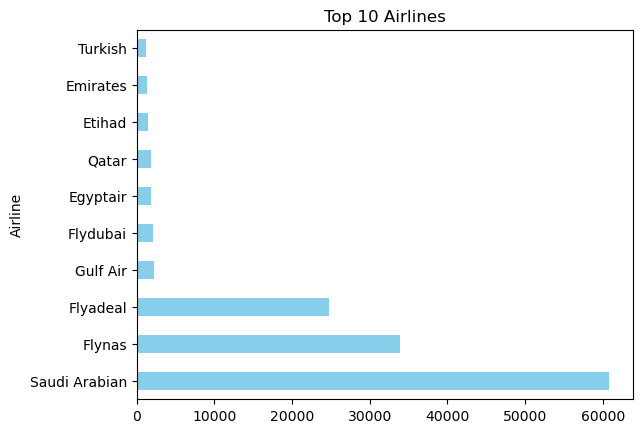

In [505]:
top_airline_flight = flightdata['Airline'].value_counts().head(10)
top_airline_flight.plot(kind='barh', color='skyblue', title='Top 10 Airlines')

<Axes: title={'center': 'The Most City departure'}, ylabel='Destination_airport'>

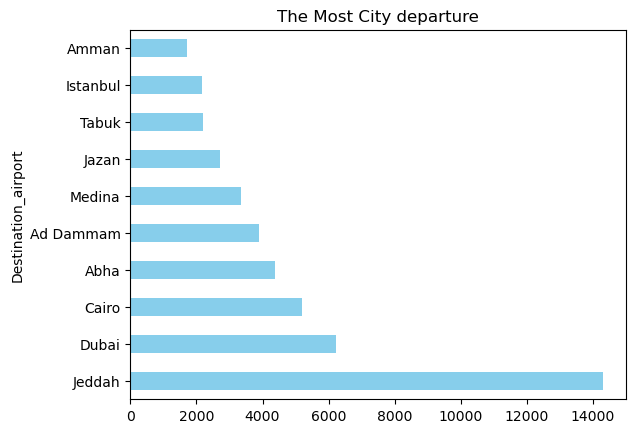

In [506]:
the_most_city_departure =flightdata[(flightdata['flight_type']=='departure')]['Destination_airport'].value_counts().head(10)
the_most_city_departure.plot(kind='barh',color = 'skyblue',title = 'The Most City departure')

<Axes: title={'center': 'The Most Continent'}, ylabel='Continent'>

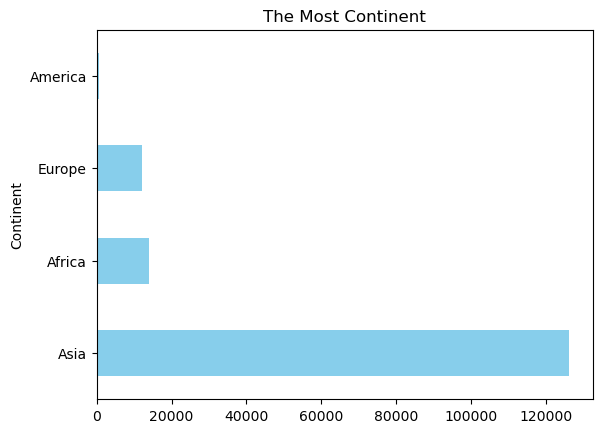

In [507]:
the_most_continent = flightdata['Continent'].value_counts()
the_most_continent.plot(kind = 'barh',color='skyblue',title='The Most Continent')

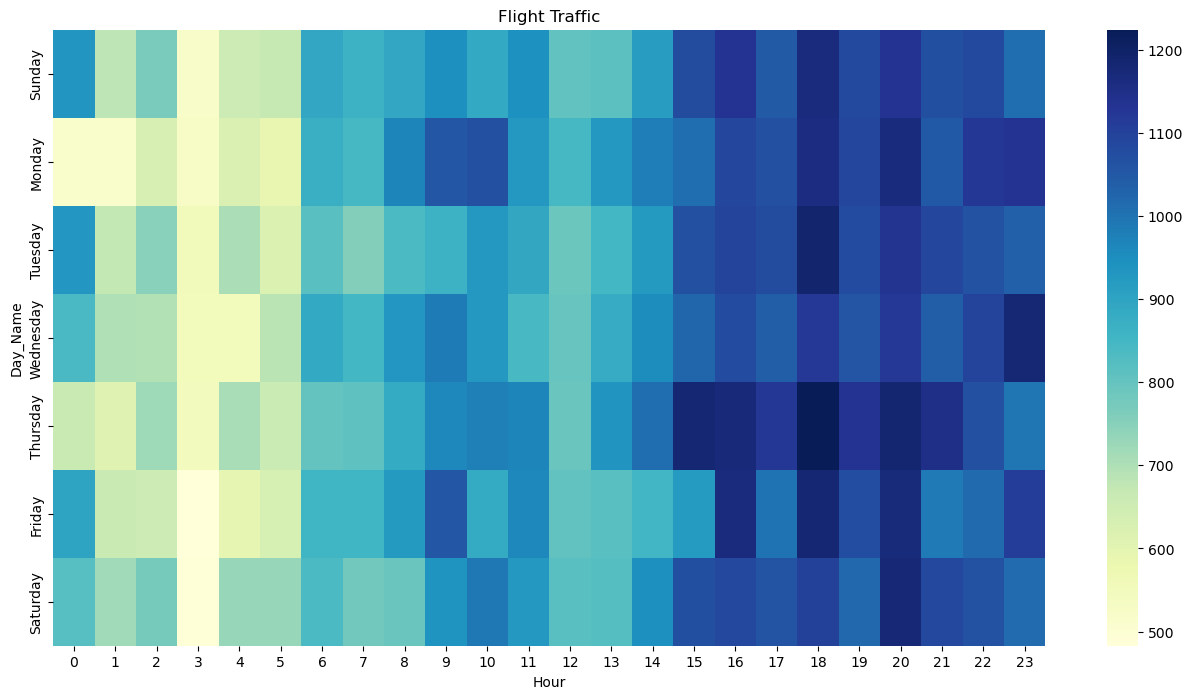

In [508]:
days_order = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
heatmap_data = heatmap_data.reindex(days_order)
plt.figure(figsize=(16, 8))
sns.heatmap(heatmap_data,cmap='YlGnBu')
plt.title('Flight Traffic')
plt.show()

In [512]:
flightdata.to_csv('clean_RUH_flight.csv',index =False)
